# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *

In [5]:
bs = 64

In [6]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [7]:
path = untar_data(URLs.PETS); path

PosixPath('/home/jordan/.fastai/data/oxford-iiit-pet')

In [12]:
path.ls()

[PosixPath('/home/jordan/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/jordan/.fastai/data/oxford-iiit-pet/images')]

In [13]:
path_anno = path/'annotations'
path_img = path/'images'

In [14]:
fnames = get_image_files(path_img)
fnames[:10]

[PosixPath('/home/jordan/.fastai/data/oxford-iiit-pet/images/Maine_Coon_9.jpg'),
 PosixPath('/home/jordan/.fastai/data/oxford-iiit-pet/images/beagle_7.jpg'),
 PosixPath('/home/jordan/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_28.jpg'),
 PosixPath('/home/jordan/.fastai/data/oxford-iiit-pet/images/Bengal_20.jpg'),
 PosixPath('/home/jordan/.fastai/data/oxford-iiit-pet/images/pomeranian_33.jpg'),
 PosixPath('/home/jordan/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_68.jpg'),
 PosixPath('/home/jordan/.fastai/data/oxford-iiit-pet/images/german_shorthaired_74.jpg'),
 PosixPath('/home/jordan/.fastai/data/oxford-iiit-pet/images/Birman_174.jpg'),
 PosixPath('/home/jordan/.fastai/data/oxford-iiit-pet/images/keeshond_33.jpg'),
 PosixPath('/home/jordan/.fastai/data/oxford-iiit-pet/images/beagle_137.jpg')]

In [15]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [16]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

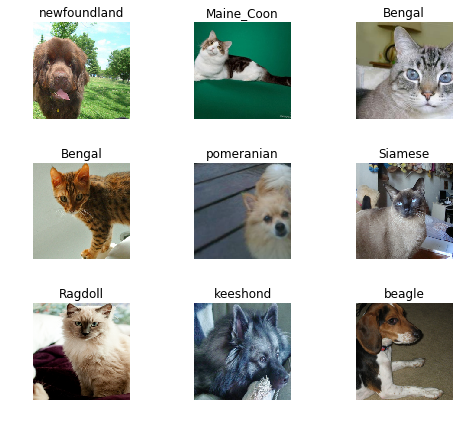

In [17]:
data.show_batch(rows=3, figsize=(7,6))

In [18]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/jordan/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:09<00:00, 9166619.69it/s] 


In [20]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.364772,0.336397,0.094723,06:21
1,0.539551,0.273944,0.086604,06:28
2,0.340207,0.228160,0.077131,06:25
3,0.245674,0.224951,0.073748,06:16


In [22]:
learn.save('stage-1')

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

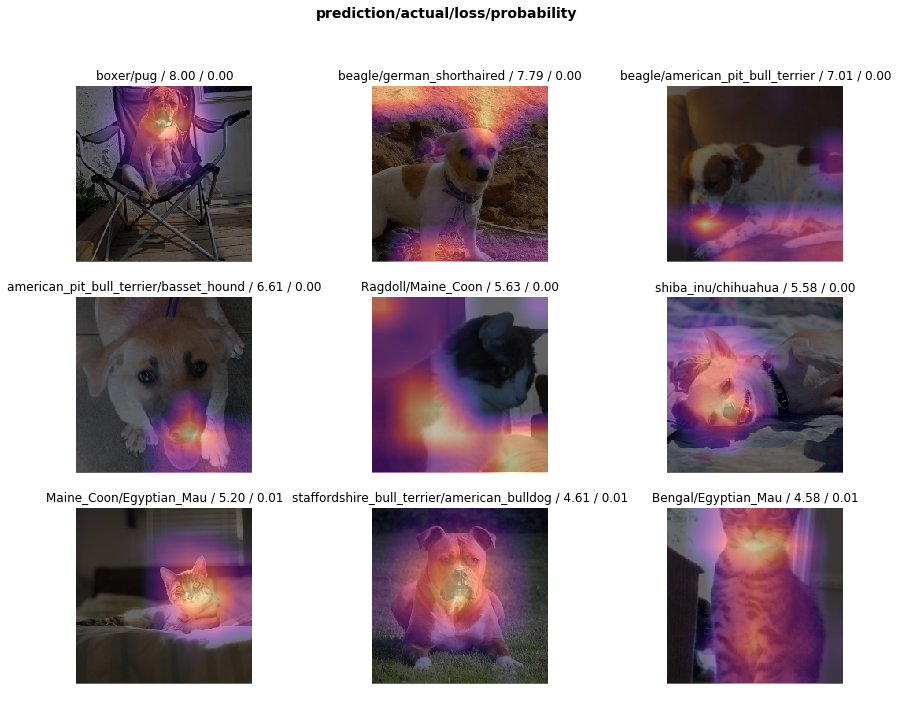

In [24]:
interp.plot_top_losses(9, figsize=(15,11))

In [25]:
doc(interp.plot_top_losses)

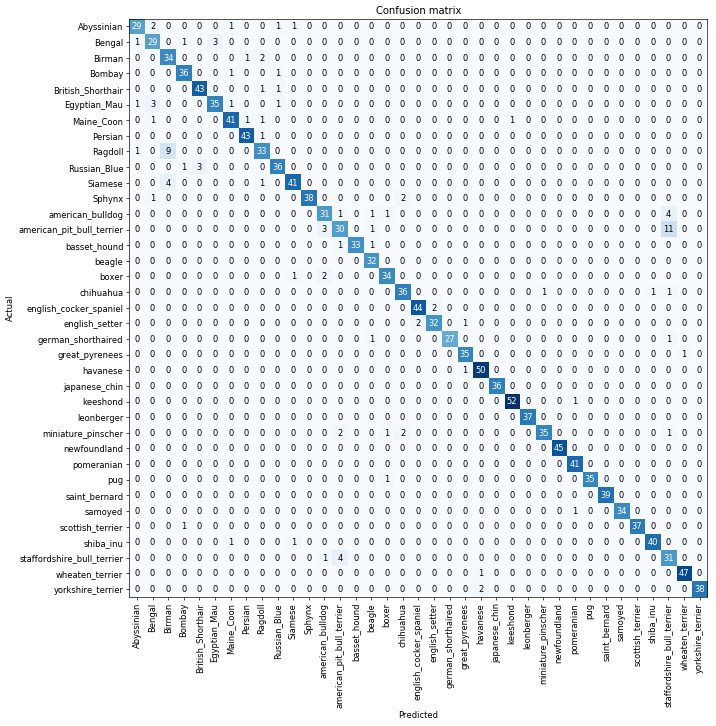

In [26]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [27]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 11),
 ('Ragdoll', 'Birman', 9),
 ('Siamese', 'Birman', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Birman', 'Ragdoll', 2),
 ('Sphynx', 'chihuahua', 2),
 ('boxer', 'american_bulldog', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('yorkshire_terrier', 'havanese', 2)]

In [28]:
learn.unfreeze()

In [29]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.529621,0.323212,0.102842,08:59


In [30]:
learn.load('stage-1');

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


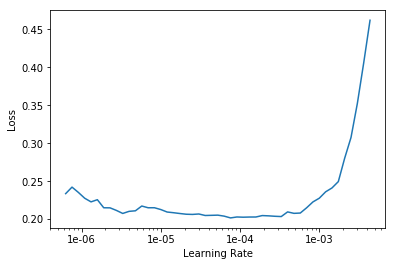

In [32]:
learn.recorder.plot()

In [33]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.220661,0.215165,0.073072,08:43
1,0.199068,0.211974,0.069012,09:02


In [34]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [35]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/jordan/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:08<00:00, 12067765.85it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


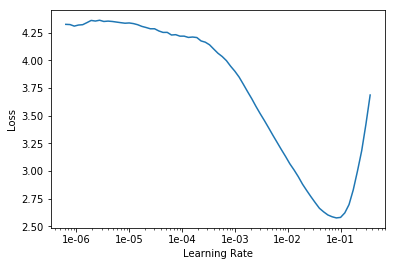

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.750700,0.312592,0.090663,23:29
1,0.390579,0.272907,0.085250,22:53
2,0.355838,0.261984,0.085927,22:50
3,0.256903,0.220704,0.069689,22:49
4,0.200775,0.193846,0.064953,22:49
5,0.137613,0.174183,0.054127,22:50
6,0.098533,0.164832,0.052774,22:52
7,0.094060,0.169004,0.048714,22:51


In [38]:
learn.save('stage-1-50')

In [40]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.105783,0.167834,0.052774,28:51
1,0.091611,0.170865,0.051421,29:41
2,0.076536,0.167339,0.048038,28:48


In [41]:
learn.load('stage-1-50');

In [42]:
interp = ClassificationInterpretation.from_learner(learn)

In [43]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('basset_hound', 'beagle', 4),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('boxer', 'american_bulldog', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Bengal', 'Maine_Coon', 2),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Ragdoll', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('english_cocker_spaniel', 'havanese', 2)]

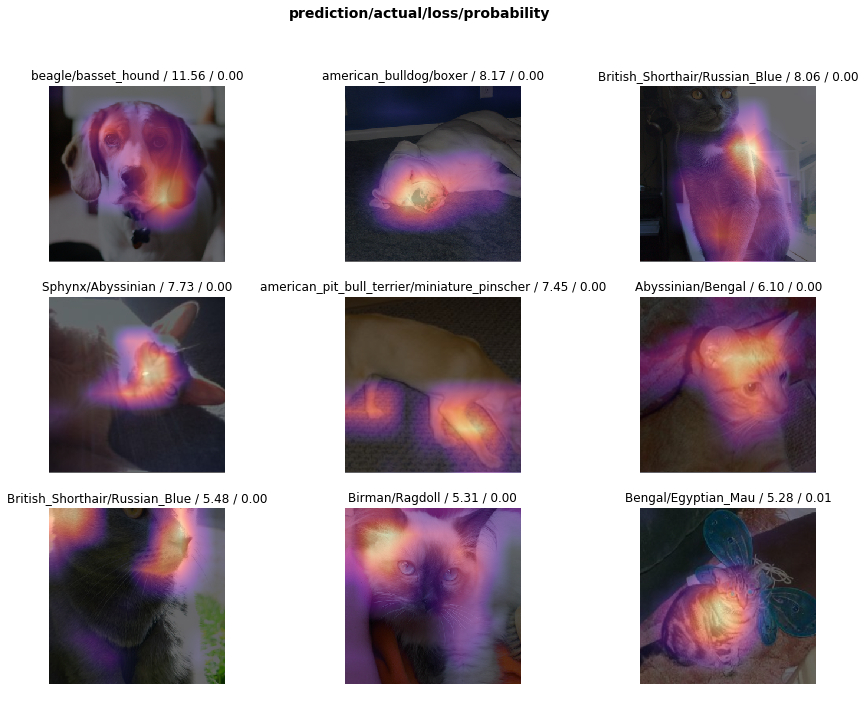

In [57]:
interp.plot_top_losses(9, figsize=(15,11))

# MNIST
Do work here

In [44]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/jordan/.fastai/data/mnist_sample')

In [45]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

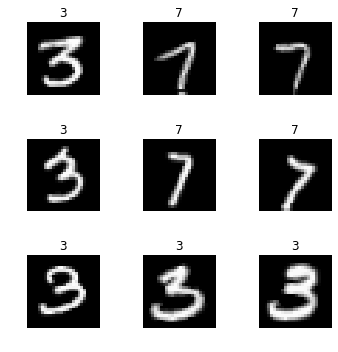

In [46]:
data.show_batch(rows=3, figsize=(5,5))

In [47]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/jordan/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:04<00:00, 9605194.63it/s] 


epoch,train_loss,valid_loss,accuracy,time
0,0.169777,0.073036,0.975466,00:32
1,0.101571,0.045696,0.984789,00:31


In [48]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [49]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

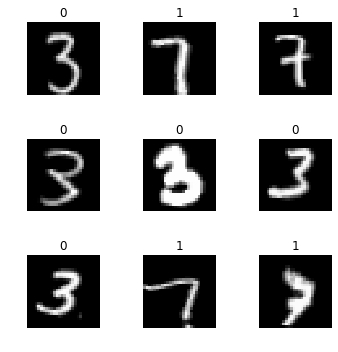

In [50]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [51]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [52]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/home/jordan/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/jordan/.fastai/data/mnist_sample/train/3/21102.png')]

In [53]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [54]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [55]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [56]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

# X-Ray Modeling
Do work here

In [67]:
path = '/home/jordan/Data/xrays/chest_xray/chest_xray/'
train_path = '/home/jordan/Data/xrays/chest_xray/chest_xray/train'
val_path = '/home/jordan/Data/xrays/chest_xray/chest_xray/val'
test_path = '/home/jordan/Data/xrays/chest_xray/chest_xray/test'

In [61]:
train_list = ImageList.from_folder(train_path)
val_list = ImageList.from_folder(val_path)
test_list = ImageList.from_folder(test_path)

In [72]:
data = ImageDataBunch.from_folder(path, train="train", valid='val', test="test", ds_tfms = get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [73]:
print(data.classes)
len(data.classes),data.c

['NORMAL', 'PNEUMONIA']


(2, 2)

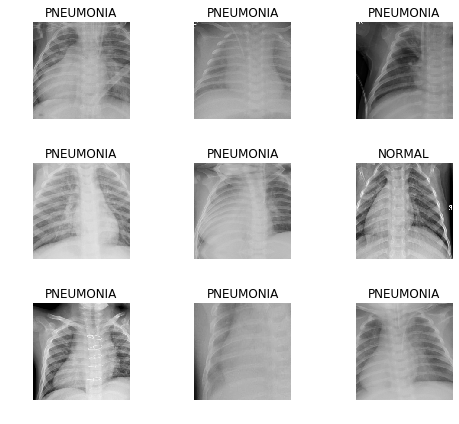

In [74]:
data.show_batch(rows=3, figsize=(7,6))

In [75]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [76]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [77]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.337403,0.519575,0.250000,06:19
1,0.187813,0.158924,0.062500,07:45
2,0.148956,0.153171,0.000000,06:02
3,0.138210,0.216548,0.125000,05:50


In [78]:
learn.save('stage-1')

In [79]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

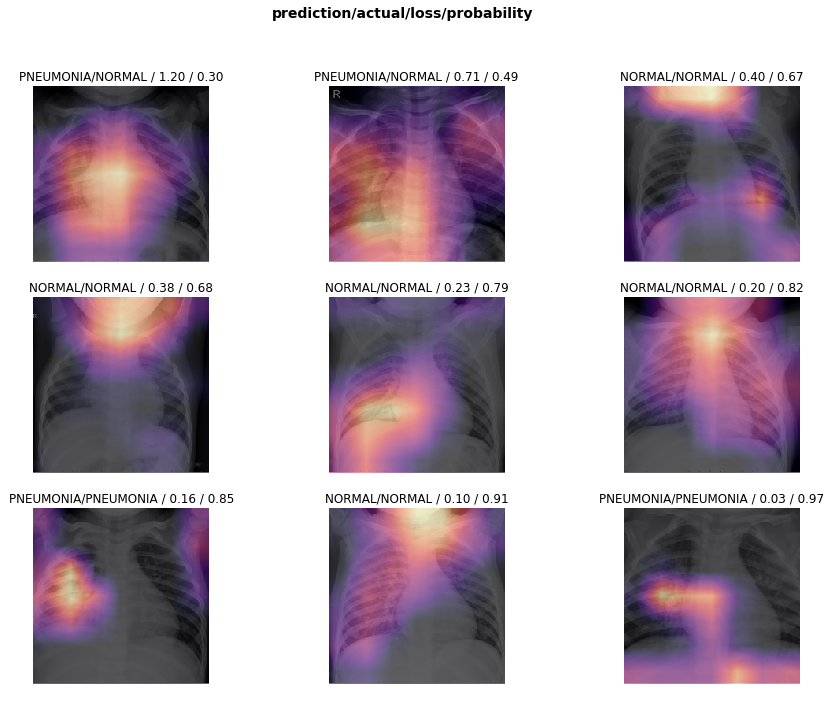

In [80]:
interp.plot_top_losses(9, figsize=(15,11))

In [81]:
doc(interp.plot_top_losses)

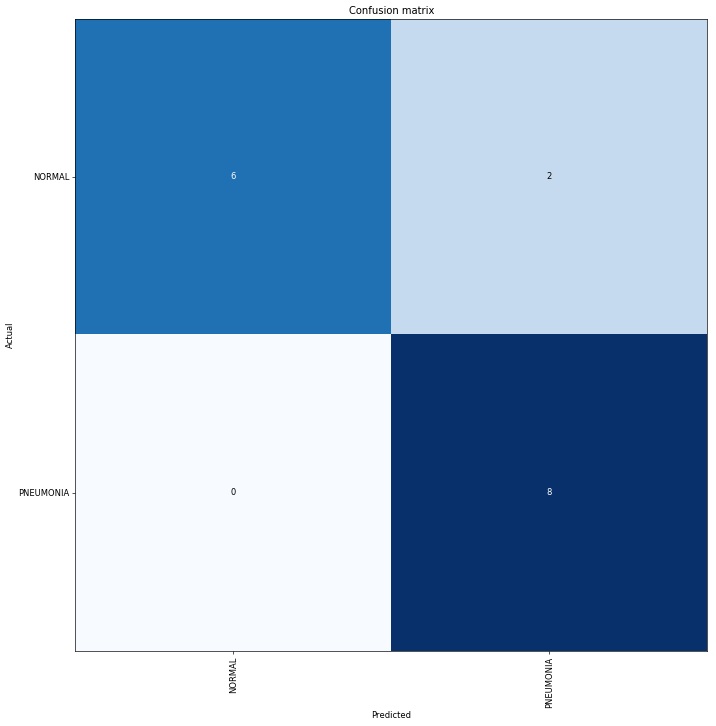

In [82]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [83]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.115985,0.161585,0.062500,14:13


In [84]:
learn.load('stage-1');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


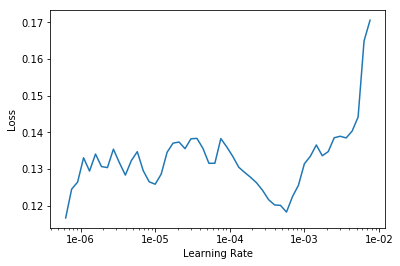

In [85]:
learn.lr_find()
learn.recorder.plot()

In [86]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.108380,0.024702,0.000000,08:12
1,0.109093,0.120493,0.062500,07:43
2,0.094814,0.182772,0.125000,07:49
3,0.080074,0.055330,0.000000,07:46
4,0.067917,0.087015,0.062500,07:50
5,0.055509,0.111792,0.062500,07:47
6,0.036099,0.028862,0.000000,07:45
7,0.033747,0.026823,0.000000,08:32


In [87]:
learn.save('stage-1-50')

In [88]:
interp = ClassificationInterpretation.from_learner(learn)

In [89]:
interp.most_confused(min_val=5)

[]

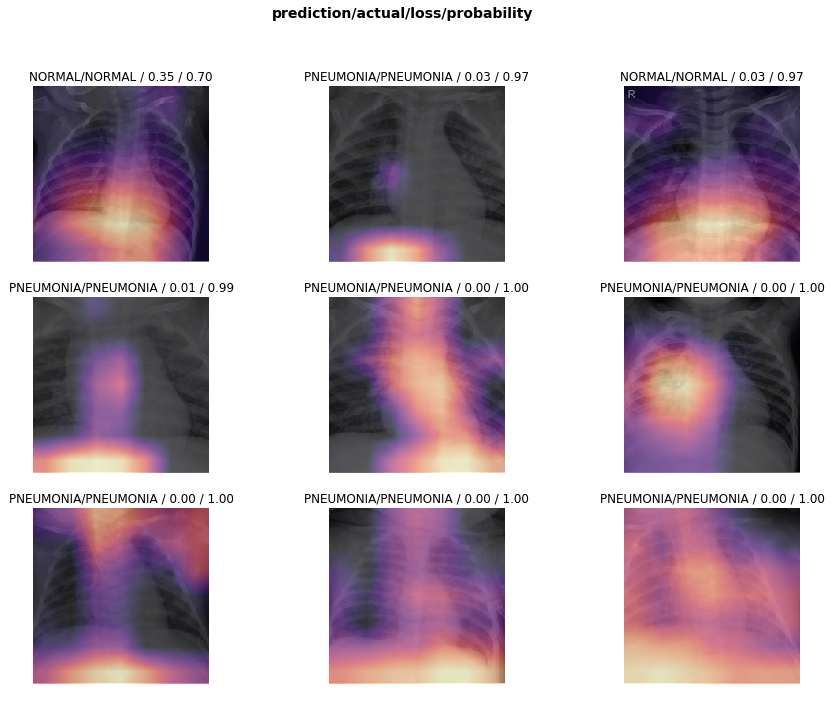

In [90]:
interp.plot_top_losses(9, figsize=(15,11))

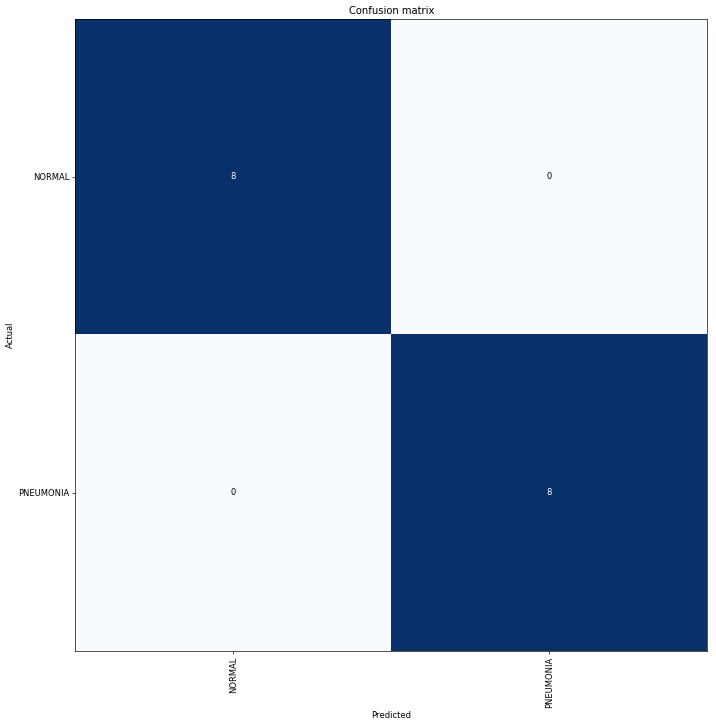

In [91]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [106]:
data_50 = ImageDataBunch.from_folder(path, train='train', valid='test', ds_tfms = get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [108]:
data_50

ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /home/jordan/Data/xrays/chest_xray/chest_xray;

Valid: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /home/jordan/Data/xrays/chest_xray/chest_xray;

Test: None

In [109]:
learn_50 = cnn_learner(data_50, models.resnet50, metrics = accuracy)

In [110]:
learn_50.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [111]:
learn_50.unfreeze()

In [112]:
learn_50.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.258404,0.382805,0.878205,20:45
1,0.171892,0.449790,0.883013,15:21
2,0.129897,0.460299,0.831731,15:22
3,0.095841,0.417145,0.878205,15:04
4,0.070308,0.327684,0.894231,15:28
5,0.065245,0.215367,0.924679,15:30
6,0.057182,0.406036,0.878205,15:05
7,0.039120,0.321413,0.905449,14:39
8,0.023321,0.345192,0.911859,14:48
9,0.029517,0.385727,0.902244,14:27


In [113]:
interp_50 = ClassificationInterpretation.from_learner(learn_50)

## Resnet 34

In [122]:
data_34 = ImageDataBunch.from_folder(path, train='train', valid='val', test = 'test', ds_tfms = get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [123]:
learn_34 = cnn_learner(data_34, models.resnet34, metrics = accuracy)

In [124]:
learn_34.unfreeze()

In [125]:
learn_34.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.301659,0.287907,0.875000,08:34
1,0.170254,0.457265,0.875000,07:48
2,0.111860,0.131508,0.937500,07:55
3,0.098570,0.130964,0.937500,07:44
4,0.084443,0.271729,0.937500,07:42
5,0.062558,0.257154,0.937500,07:41
6,0.064743,0.025436,1.000000,07:41
7,0.040358,0.015115,1.000000,07:41
8,0.029321,0.007833,1.000000,07:40
9,0.028215,0.004747,1.000000,07:41


In [126]:
interp_34 = ClassificationInterpretation.from_learner(learn_34)

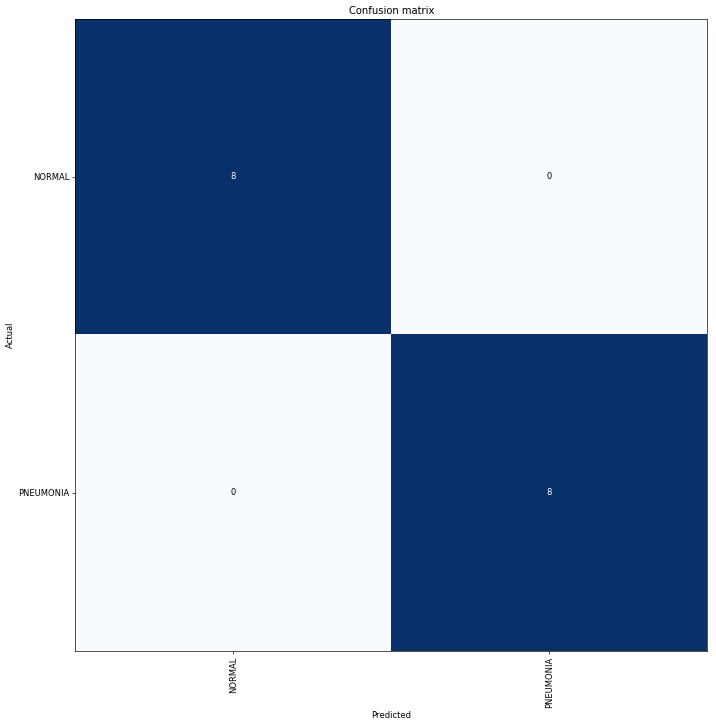

In [127]:
interp_34.plot_confusion_matrix(figsize=(12,12), dpi=60)

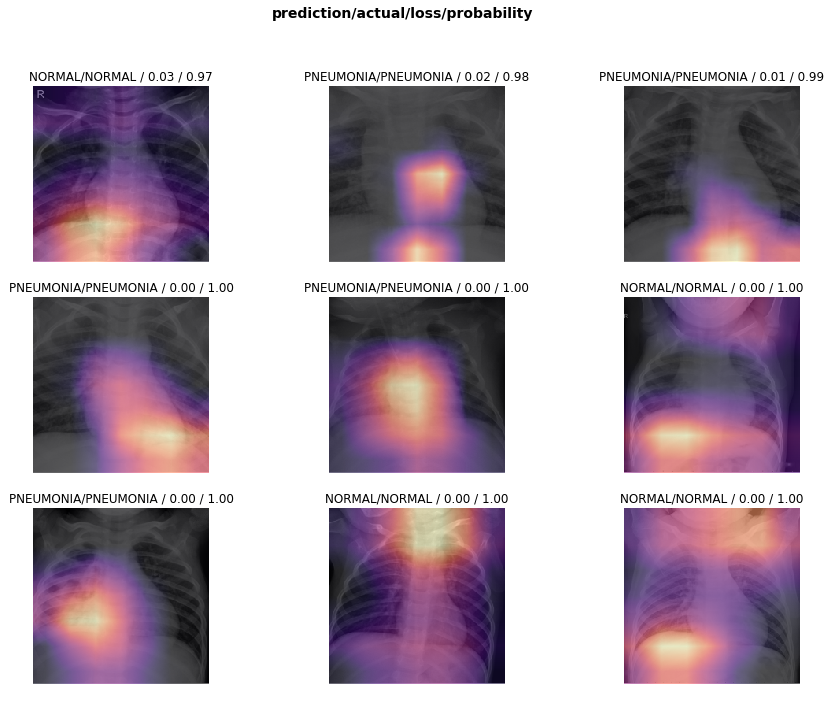

In [128]:
interp_34.plot_top_losses(9, figsize=(15,11))

In [134]:
learn.save('learner_34')

In [135]:
learn_34_t = learn.load('learner_34')

In [141]:
data_34_test = ImageDataBunch.from_folder(path, train='train', valid='test', ds_tfms = get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [145]:
learn_34_t.fit_one_cycle(1, data_34_test)

TypeError: unsupported operand type(s) for /: 'ImageDataBunch' and 'float'

In [ ]:
interp_34_t = ClassificationInterpretation.from_learner(learn_34_t)

In [ ]:
interp_34_t.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Results
Show graphs and stats here

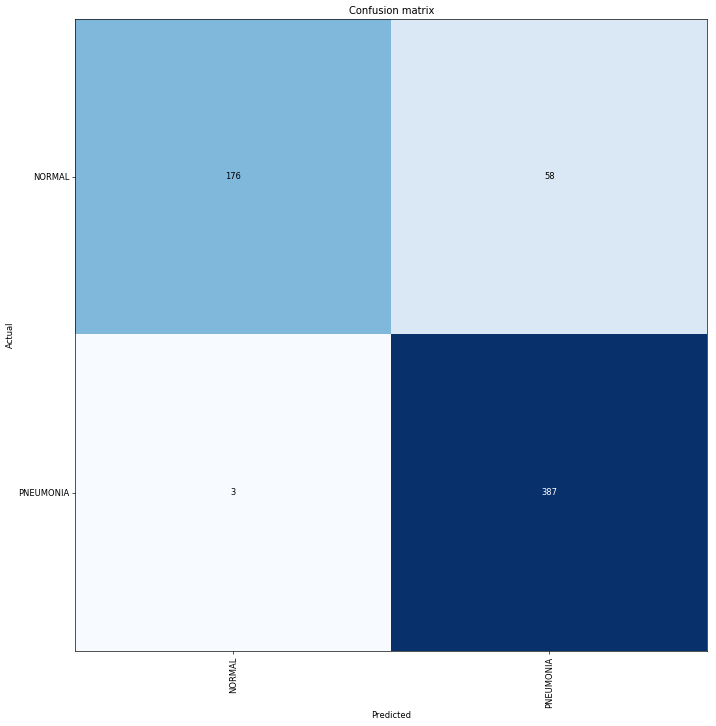

In [114]:
interp_50.plot_confusion_matrix(figsize=(12,12), dpi=60)

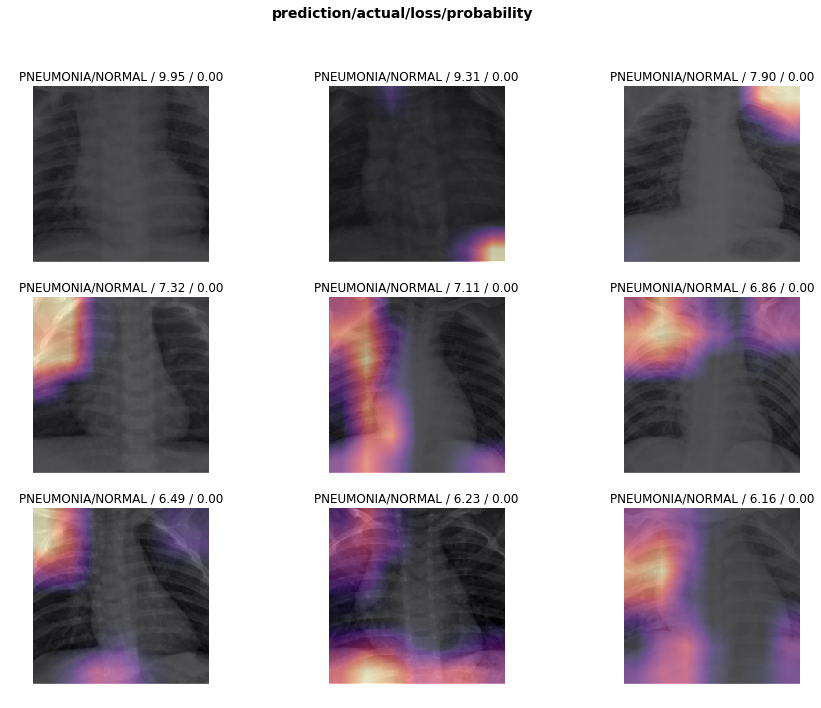

In [115]:
interp_50.plot_top_losses(9, figsize=(15,11))

# Conclusions and Next Steps
Summarize findings here